In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
alpha=120 /180*np.pi
vw=330
rmax=4
R0=8.2
V0=240
z_l=np.linspace(-rmax,rmax,400)
R_l=np.linspace(0,rmax,100)
theta_l=np.linspace(0,2*np.pi,100)
z,R,theta=np.meshgrid(z_l,R_l,theta_l)
r=np.sqrt(z**2+R**2)
d=np.sqrt(R**2+R0**2-2*R*R0*np.cos(theta))
l=np.arcsin(R/d*np.sin(theta))
b=np.arctan(z/d)
l_c=l*180/np.pi
b_c=b*180/np.pi
phi=np.arctan(z/R)
vlsr=vw*(np.sin(phi)*np.sin(b)-np.cos(phi)*np.cos(b)*np.cos(l+theta))-V0*np.sin(l)*np.cos(b)
x=-R*np.cos(theta)
y=R*np.sin(theta)
model_radec=SkyCoord(l=l_c,b=b_c,frame='galactic',unit=u.deg).icrs
ras,decs=model_radec.ra.deg,model_radec.dec.deg

/tmp/ipykernel_135410/1632165120.py:16: RuntimeWarning: divide by zero encountered in divide
  phi=np.arctan(z/R)


In [3]:
idx=(R<(abs(z/np.tan((np.pi-alpha)/2))))*(r<rmax)
#idx=idx*(l_c>-10)*(l_c<16)*((b_c>2)*(b_c<20)+(b_c<-2)*(b_c>-10))
#idx=idx*(vlsr<-150)
#idx=(l_c>8)*(l_c<16)*(b_c>8)*(b_c<20)
#idx=True
idx_gbt1=(l_c>-10)*(l_c<10)*((b_c>-8)*(b_c<-4)+(b_c>3)*(b_c<9))
idx_gbt2=(l_c>0)*(l_c<6)*(b_c>1)*(b_c<3)
idx_fast=(ras<269.4)*(ras>252)*(decs<-10.47)*(decs>-13.88)
idx=idx*(idx_gbt1+idx_gbt2+idx_fast)
#idx=idx*idx_gbt1

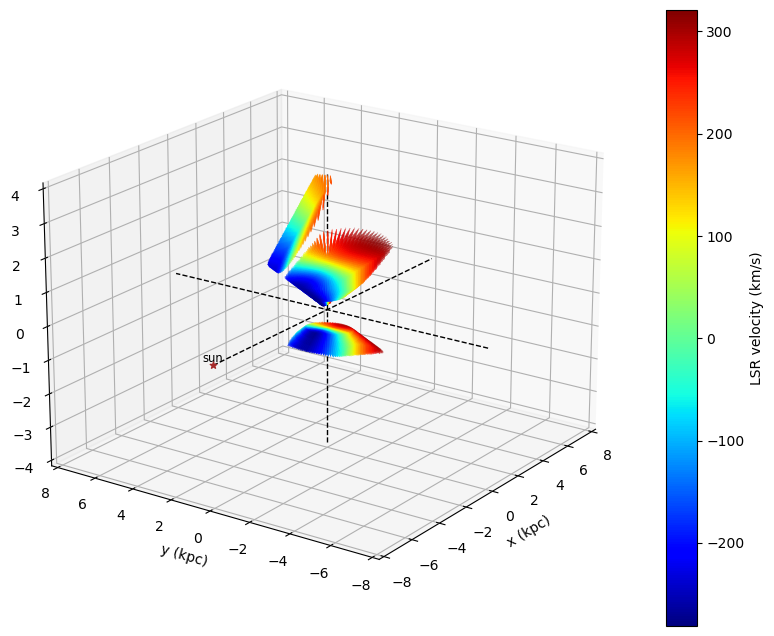

In [4]:
fig=plt.figure(figsize=[10,8])
ax=plt.subplot(projection='3d')
ax.plot([0,0],[0,0],[-4,4],'--',color='k',lw=1)
ax.plot([-8,8],[0,0],[0,0],'--',color='k',lw=1)
ax.plot([0,0],[-8,8],[0,0],'--',color='k',lw=1)
ax.scatter(-8,0,0,s=24,marker='*',color='brown')
scas=ax.scatter(x[idx],y[idx],z[idx],s=0.5,c=vlsr[idx],cmap='jet',edgecolors='none')
cbar=plt.colorbar(scas)
cbar.set_label('LSR velocity (km/s)')
ax.text(-8,0,0,'sun',fontsize='small',va='bottom',ha='center')
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_zlim(-4,4)
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')
ax.view_init(elev=20., azim=215)
#ax.view_init(elev=0,azim=180)
plt.savefig('outflow_model_3D.png')

In [5]:
targets=pd.read_csv('targets_select.csv')
radec=np.array([targets['RA_d'],targets['DEC_d']]).astype(float)
gal=SkyCoord(ra=radec[0],dec=radec[1], frame='icrs',unit=u.deg).galactic
targets.insert(9,'longitude',gal.l.deg)
targets.insert(10,'latitude',gal.b.deg)

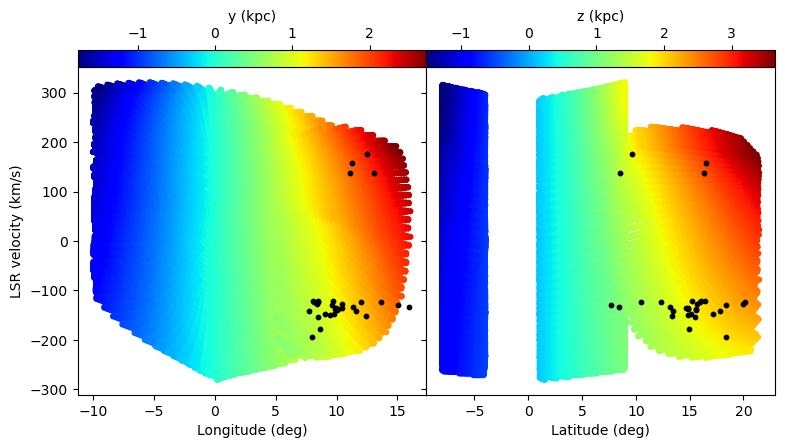

In [6]:
fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=[9,5],gridspec_kw = {'wspace':0, 'hspace':0})
mdp=axs[0].scatter(l_c[idx],vlsr[idx],s=20,c=y[idx],cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[0],location='top',pad=0)
cbar.set_label('y (kpc)')
vel=(1420405751.768-targets['FREQ'].astype(float))/1420405751.768*299792.458
axs[0].scatter(targets['longitude'],vel,s=40,c='k',marker='.')
axs[0].set_xlabel('Longitude (deg)')
axs[0].set_ylabel('LSR velocity (km/s)')
mdp=axs[1].scatter(b[idx]*180/np.pi,vlsr[idx],s=20,c=z[idx],cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[1],location='top',pad=0)
cbar.set_label('z (kpc)')
axs[1].scatter(targets['latitude'],vel,s=40,c='k',marker='.')
axs[1].set_xlabel('Latitude (deg)')
#axs[1].set_yticks([])
plt.savefig('outflow_model_l_v.pdf')

In [7]:
gbtcand=np.loadtxt('GBT_cand_table.csv',delimiter=',',dtype=str)
gbt_l=gbtcand[:,1].astype(float)
gbt_l[gbt_l>180]=gbt_l[gbt_l>180]-360
gbt_acc_l=np.array([1.43,1.6,1.78,4.34])
gbt_acc_b=np.array([2.42,2.06,1.34,1.24])
gbt_acc_v=np.array([-176.4,-147.2,-177.4,-157.4])

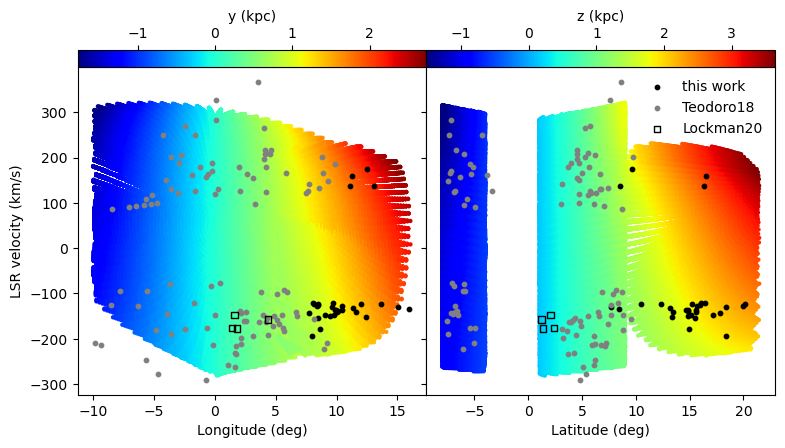

In [8]:
fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=[9,5],gridspec_kw = {'wspace':0, 'hspace':0})
mdp=axs[0].scatter(l_c[idx],vlsr[idx],s=10,c=y[idx],cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[0],location='top',pad=0)
cbar.set_label('y (kpc)')
vel=(1420405751.768-targets['FREQ'].astype(float))/1420405751.768*299792.458
axs[0].scatter(targets['longitude'],vel,s=40,c='k',marker='.')
axs[0].scatter(gbt_l,gbtcand[:,3].astype(float),s=40,c='grey',marker='.')
axs[0].scatter(gbt_acc_l,gbt_acc_v,s=20,c='none',edgecolor='k',marker='s')
axs[0].set_xlabel('Longitude (deg)')
axs[0].set_ylabel('LSR velocity (km/s)')
mdp=axs[1].scatter(b[idx]*180/np.pi,vlsr[idx],s=10,c=z[idx],cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[1],location='top',pad=0)
cbar.set_label('z (kpc)')
axs[1].scatter(targets['latitude'],vel,s=40,c='k',marker='.',label='this work')
axs[1].scatter(gbtcand[:,2].astype(float),gbtcand[:,3].astype(float),s=40,c='grey',marker='.',label='Teodoro18')
axs[1].scatter(gbt_acc_b,gbt_acc_v,s=20,c='none',edgecolor='k',marker='s',label='Lockman20')
axs[1].set_xlabel('Latitude (deg)')
#axs[1].set_yticks([])
plt.legend(frameon=False)
plt.savefig('outflow_model_l_v.png')

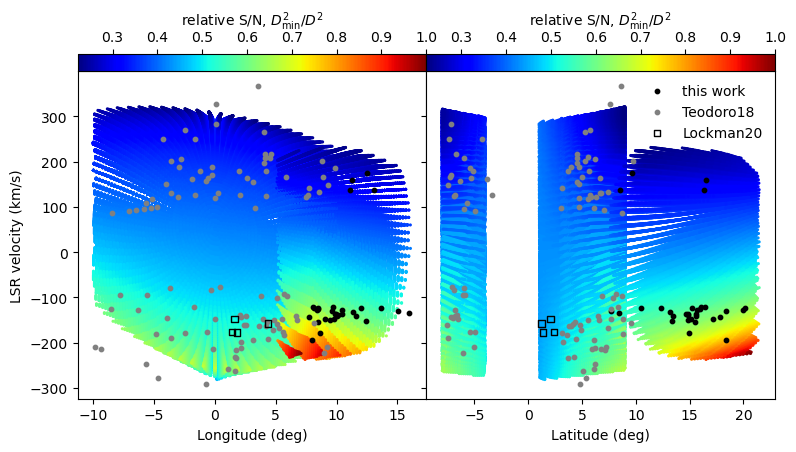

In [9]:
D=np.sqrt(d**2+z**2)
SN=1/D[idx]**2
SN=SN/np.max(SN)
fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=[9,5],gridspec_kw = {'wspace':0, 'hspace':0})
mdp=axs[0].scatter(l_c[idx],vlsr[idx],s=5,c=SN,cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[0],location='top',pad=0)
cbar.set_label(r'relative S/N, $D^2_{\rm min}/D^2$')
vel=(1420405751.768-targets['FREQ'].astype(float))/1420405751.768*299792.458
axs[0].scatter(targets['longitude'],vel,s=40,c='k',marker='.')
axs[0].scatter(gbt_l,gbtcand[:,3].astype(float),s=40,c='grey',marker='.')
axs[0].scatter(gbt_acc_l,gbt_acc_v,s=20,c='none',edgecolor='k',marker='s')
axs[0].set_xlabel('Longitude (deg)')
axs[0].set_ylabel('LSR velocity (km/s)')
mdp=axs[1].scatter(b[idx]*180/np.pi,vlsr[idx],s=5,c=SN,cmap='jet',edgecolors='None')
cbar=fig.colorbar(mdp,ax=axs[1],location='top',pad=0)
cbar.set_label(r'relative S/N, $D^2_{\rm min}/D^2$')
axs[1].scatter(targets['latitude'],vel,s=40,c='k',marker='.',label='this work')
axs[1].scatter(gbtcand[:,2].astype(float),gbtcand[:,3].astype(float),s=40,c='grey',marker='.',label='Teodoro18')
axs[1].scatter(gbt_acc_b,gbt_acc_v,s=20,c='none',edgecolor='k',marker='s',label='Lockman20')
axs[1].set_xlabel('Latitude (deg)')
#axs[1].set_yticks([])
plt.legend(frameon=False)
plt.savefig('outflow_model_l_v.png')